<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from statsmodels.nonparametric.smoothers_lowess import lowess

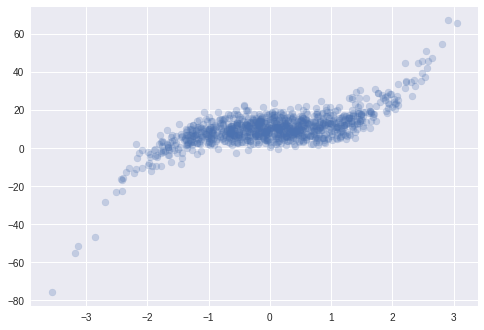

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
plt.style.use("seaborn")

import numpy as np
np.random.seed(8)
X = np.random.randn(1000,1)
Y = 2*(X**3) + 10 + 4.6*np.random.randn(1000,1)
plt.scatter(X, Y, alpha=0.25)
plt.show()

In [35]:
# Weight Matrix in code. It is a diagonal matrix.
def weightmatrix(point, X, tau): 
    
  # tau   --> bandwidth
  # X     --> Training data.
  # point --> the x where we want to make the prediction.
    
  # m is the No of training examples .
    m = X.shape[0] 
    
  # Initialising W as an identity matrix.
    weight = np.mat(np.eye(m)) 
    
  # Calculating weights for all training examples [x(i)'s].
    for i in range(m): 
        xi = X[i] 
        d = (-2 * tau * tau) 
        weight[i, i] = np.exp(np.dot((xi-point), (xi-point).T)/d) 
        
    return weight

In [36]:
def predict(X, y, point, tau): 
    
   # m = number of training examples. 
    m = X.shape[0] 
    
   # Appending a cloumn of ones in X to add the bias term.
   ###  Just one parameter: theta, that's why adding a column of ones        
   #### to X and also adding a 1 for the point where we want to          
   #### predict. 
    X_ = np.append(X, np.ones(m).reshape(m,1), axis=1) 
    
   # point is the x where we want to make the prediction. 
    point_ = np.array([point, 1]) 
    
   # Calculating the weight matrix using the weight matrix function we wrote      #  # earlier. 
    weight = weightmatrix(point_, X_, tau) 
    
  # Calculating parameter theta using the formula.
    theta = np.linalg.pinv(X_.T*(weight * X_))*(X_.T*(weight * y)) 
    
  # Calculating predictions.  
    pred = np.dot(point_, theta) 
    
   # Returning the theta and predictions 
    return theta, pred

In [37]:
def plot_predictions(X, y, tau, nval):
   # X --> Training data. 
   # y --> Output sequence.
   # nval --> number of values/points for which we are going to
   # predict.
   # tau --> the bandwidth.     
    # The values for which we are going to predict.
   # X_test includes nval evenly spaced values in the domain of X.
    X_test = np.linspace(-3, 3, nval) 
    
   # Empty list for storing predictions. 
    preds = [] 
    
   # Predicting for all nval values and storing them in preds. 
    for point in X_test: 
        theta, pred = predict(X, y, point, tau) 
        preds.append(pred)
        
   # Reshaping X_test and preds
    X_test = np.array(X_test).reshape(nval,1)
    preds = np.array(preds).reshape(nval,1)
    
   # Plotting 
    plt.plot(X, y, 'b.')
    plt.plot(X_test, preds, 'r.') # Predictions in red color.
    plt.show()

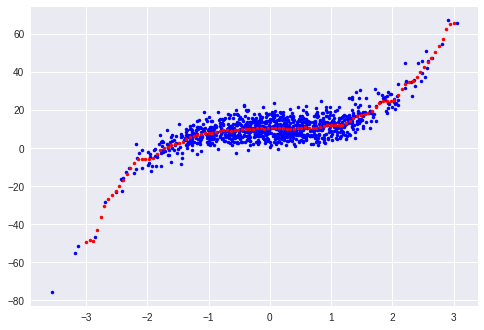

In [38]:
plot_predictions(X, y, 0.08, 100)

*   [LOESS Smoothing data using local regression](https://towardsdatascience.com/loess-373d43b03564)
*  [LOWESS Smoother, STATSMODELS](https://www.statsmodels.org/dev/examples/notebooks/generated/lowess.html)
*   https://www.allendowney.com/blog/2019/04/01/local-regression-in-python/
*   https://www.geeksforgeeks.org/implementation-of-locally-weighted-linear-regression/
*   https://towardsdatascience.com/locally-weighted-linear-regression-in-python-3d324108efbf

El mejor ajuste de un modelo de regresión local siempre será el de punto por punto, con un modelo por punto.
Puede que el número de intervalos de corte o en este caso puntos query estén definidos.
Puede que además que se incluya el tamaño del vecindario de los intervalos.
En este caso estos son parámetros del modelo, sin embargo si estas son variables de decisión, el modelo se vuelve un problema de optimal binning, y es aplicado a discretización.
